# Lecture 10: Diffusion and Phase Behavior
---

In [4]:
import sys
sys.path.append("/pithy/code")
from pithy import *
from scipy.special import erf,erfc

%matplotlib inline

### Boltzmann: Bridging Time and Space
---

The diffusion relationship invokes variability in time and space, but the inherent link between Fick's 1st and 2nd laws provides a way to normalize to a single variable to study trends. This is called the Boltzmann Substitution.

if we take that 

$$y = \frac{x}{\sqrt{t}} $$

then writing the 2nd law,

$$\left(\frac{\partial C}{\partial x} \right)_t = -\left(\frac{y}{2t}\right)\left(\frac{\partial C}{\partial y}\right)_t$$


$$\left(\frac{\partial C}{\partial x} \right)_t = \left(\frac{1}{\sqrt{t}}\right)\left(\frac{\partial C}{\partial y}\right)_t$$

$$\left(\frac{\partial^2C}{\partial^2x} \right)_t = \left(\frac{1}{t}\right)\left(\frac{\partial^2 C}{\partial^2 y}\right)_t$$


$$-\frac{y}{2}\frac{\partial C}{\partial y} = \frac{\partial }{\partial y}\left(D\frac{\partial C}{\partial y}\right)$$


Now let's examine this effect through different condition, all where $D$ is not a function of $C$.


### For a Single Slab

Let's assume a slab in space at Concentration $C_0$ at $t=0$

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-2.png">

The solution to this is
 
$$C(x,t) = \frac{C_0}{2}\left(
 erf(\frac{h-x}{2\sqrt{Dt}}) 
+ erf(\frac{h+x}{2\sqrt{Dt}}) 
\right)$$

where 

$$\text{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-u^2} du  $$


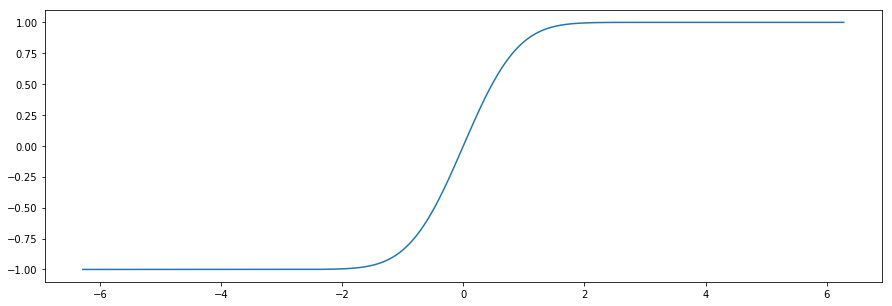

In [5]:
figure(figsize=(15,5))
#Let's just explore erf first.....|
a = linspace(2*-pi,2*pi,1000)
plot(a,erf(a))
show()

So the error function creates a sigmoidal function where

$$z < -\pi, \text{erf}(z) == -1$$
$$z >  \pi, \text{erf}(z) == 1$$
$$z =  0, \text{erf}(z) == 0$$


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


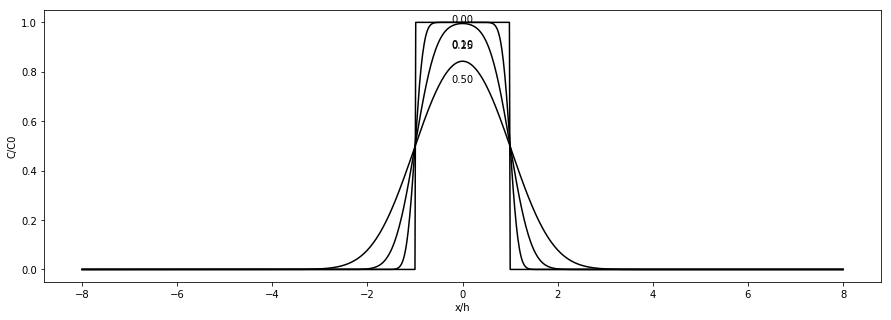

In [6]:
figure(figsize=(15,5))

def slab(x,t,C0,D):
    h = 1
    p1 = erf((h-x)/(2*sqrt(D*t)))
    p2 = erf((h+x)/(2*sqrt(D*t)))
    return (C0/2)*(p1+p2)

x = linspace(-8,8,1000)
D = 1e-6 #cm/s^m2 ()
C0 = 1.0

sqDt = array([0,.1,.25,.5])#,1,2,4,1000]) # to match page 161 figure 9, and then some

for tt in sqDt**2/D:
    val = sqrt(D*tt)
    out = slab(x,tt,C0,D)
    plot(x,out,'k')
    if tt == 0: y = 1
    else: y= max(out)*.9
    annotate("%.2f" % val, xy=(0,y),ha="center")

ylabel("C/C0")
xlabel("x/h")
show()

### For a Sphere

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-3.png">

 

$$C(r,t) =  
\frac{C_0}{2}\left(
  \text{erf}\left(\frac{a-r}{2\sqrt{Dt}}\right) 
+ \text{erf}\left(\frac{a+r}{2\sqrt{Dt}}\right) 
\right)
-
\frac{C_0}{r}\sqrt\frac{Dt}{\pi}\left(
  \exp{\left(\frac{-(a-r)^2}{4Dt}\right)} 
- \exp{\left(\frac{-(a+r)^2}{4Dt}\right)} 
\right)$$

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


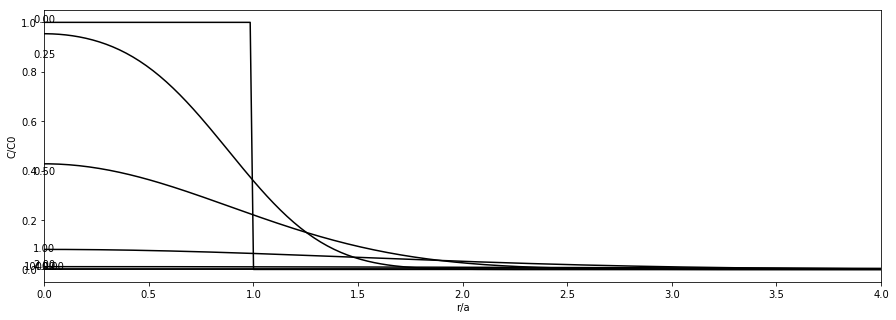

In [7]:
figure(figsize=(15,5))

def sphere(r,t,C0,D):
    a = 1
    p1 = erf((a-r)/(2*sqrt(D*t)))
    p2 = erf((a+r)/(2*sqrt(D*t)))
    p3 = exp(-(a-r)**2/(4*D*t))
    p4 = exp(-(a+r)**2/(4*D*t))

    return (C0/2)*(p1+p2) - (C0/r)*sqrt(D*t/pi)*(p3-p4)

r = linspace(-8,8,1000)
D = 1e-6 #cm/s^m2 ()
C0 = 1.0

sqDt = array([0,.25,.5,1,2,4,1000]) # to match page 161 figure 9, and then some

for tt in sqDt**2/D:
    val = sqrt(D*tt)
    out = sphere(r,tt,C0,D)
    plot(x,out,'k')
    if tt == 0: y = 1
    else: y= max(out)*.9
    annotate("%.2f" % val, xy=(0,y),ha="center")

ylabel("C/C0")
xlabel("r/a")
xlim(0,4)
show()

### Two Infinite Slabs

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-4.png">

$$C(x,t) = \frac{C_0}{2}\text{erfc}\left(\frac{x}{2\sqrt{Dt}}\right) $$ 

where 

$$\text{erfc}(z)=1-\text{erf}(z)$$

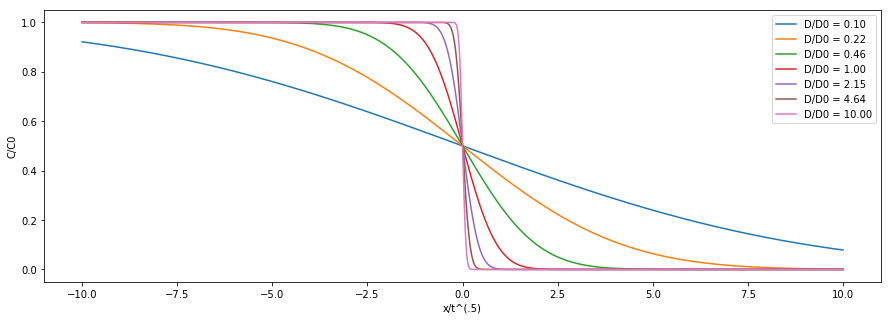

In [8]:
figure(figsize=(15,5))

ff = linspace(-10,10,1000)

for d in logspace(-1,1,7):
    out = .5*erfc(d*ff)
    plot(ff,out,label="D/D0 = %.2f" % d)

legend()
xlabel("x/t^(.5)")
ylabel("C/C0")
show()



## Phase Separation
----

So we've discussed the thermodynamics of mixing by assigning a mixing coefficient we call the activity

$$ a_i = \lambda_i x_i $$

and we can approximate this effect by

$$ \ln(\lambda_1) =  \alpha x_2^2 $$
$$ \ln(\lambda_2) =  \alpha x_1^2 $$

So

$$ \Delta G^\text{mix} = R_gT\sum_i x_i\ln(\lambda_i) + \Delta G^\text{mix,id}$$

and for a binary mixture

$$ \Delta G^\text{mix} = R_gT\alpha x_1 x_2 + \Delta G^\text{mix,id}$$




And we then motivated this:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in multiply


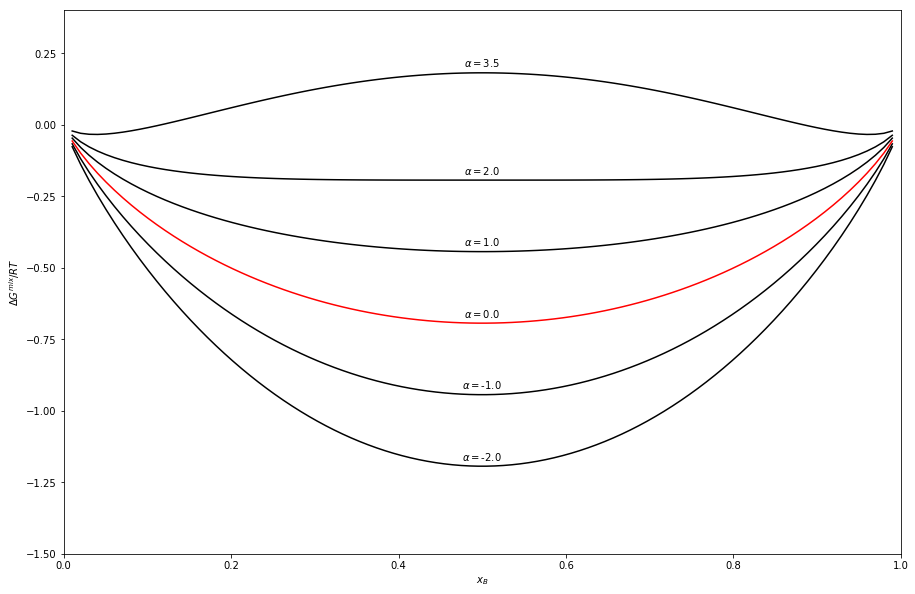

In [9]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(0,1,100)
xb = 1-xa


figure(figsize=(15,10))
for i in [-2,-1,0,1,2,3.5]:
    alpha = i

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    color = 'k'
    if i == 0: color ='r'
    plot(xb,Gmm,color)
    mid = Gmm[len(Gmm)/2]
    annotate('$\\alpha = $%.1f'%i,xy=(.5,mid+.02),ha='center')

ylim(-1.5,.4)
xlim(0,1)
    
    
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_B$")    
show()

So what _happens_ when the phase separates like this?

Well, let's think about what the competing forces are:

The species have some want to demix because there is an energetic penalty for this existence.
The species have some want to mix because entropy motivates this.

How would temperature change this? Well recall

$$\alpha = \frac{zN_A\Delta U}{R_g T} $$

And we saw above that as alpha reaches 2, we are at the critical point, 

$$T_C \approx = \frac{zN_A\Delta U}{2R_g}$$

so, assuming a constant $\Delta U$ with T, a dangerous assumption but lets be wild.... 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in multiply


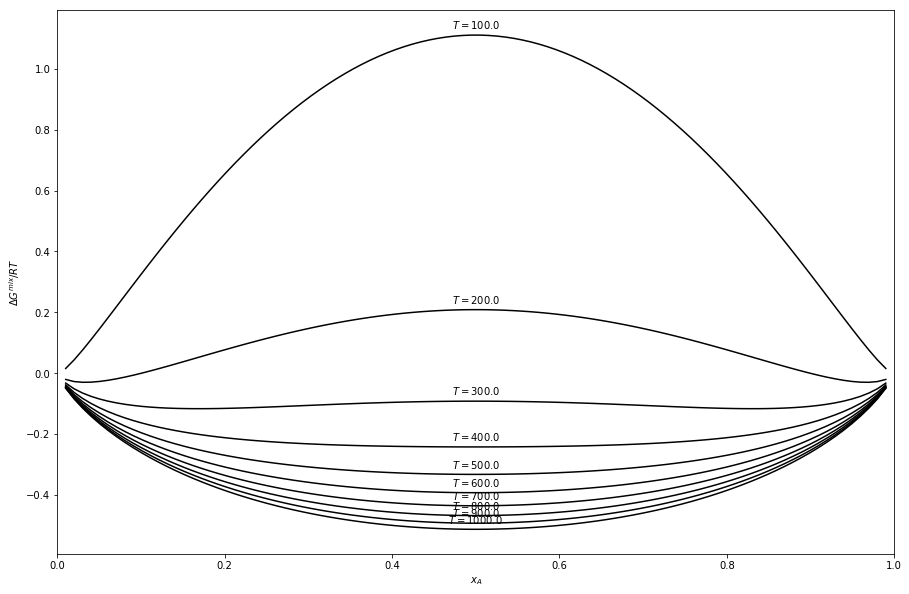

In [13]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(0,1,100)
xb = 1-xa

Na = 10
delU = 100
z = 6
def alphaf(T):
    return z*Na*delU/(R*T)

Ts = linspace(100,1000,10)

figure(figsize=(15,10))
for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    color = 'k'
    if i == 0: color ='r'
    plot(xb,Gmm,color)
    mid = Gmm[len(Gmm)/2]
    annotate('$T = $%.1f'%T,xy=(.5,mid+.02),ha='center')

#ylim(-1.5,.4)
xlim(0,1)
    
    
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_A$")    
show()

Now let's explore $\frac{\partial G}{\partial x}$ at various $T$

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply


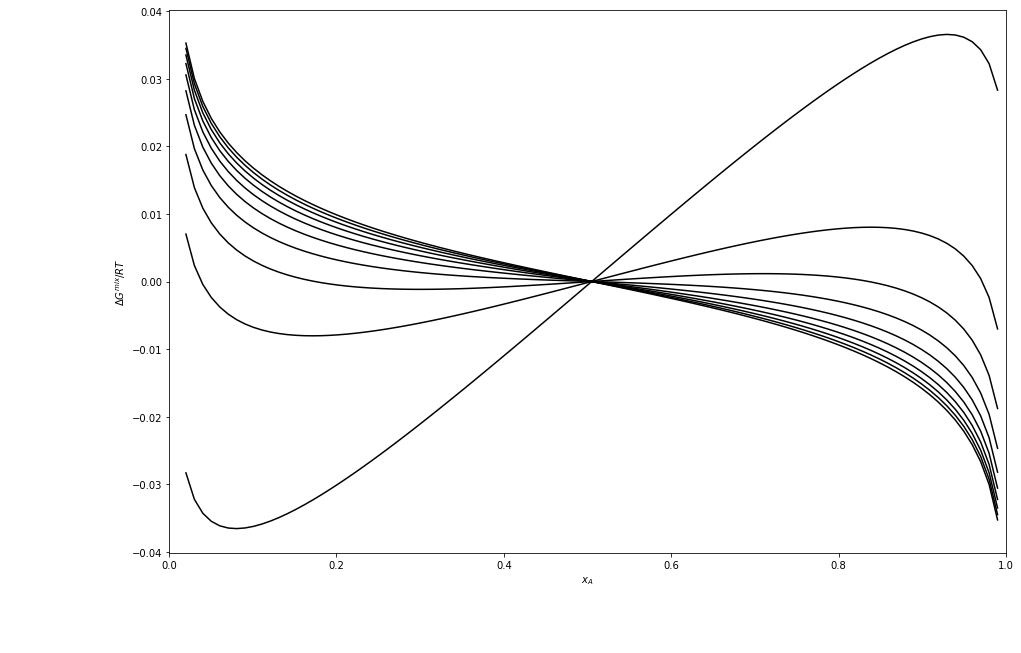

In [15]:
figure(figsize=(15,10))
for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    dG = diff(Gmm)
    ddG = diff(dG)
    color = 'k'
    if i == 0: color ='r'
    subplot(2,1,1)
    plot(xb[:-1],dG,color)
    subplot(2,1,2)
    plot(xb[:-2],ddG,color)
 
#ylim(-1.5,.4)
xlim(0,1)   
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_A$")    
show()

So we see that we go from two minima to one minimum as a function of temperature. As we cool, we have a driving force to phase separate.  If we plot the ideal compositions as a function of temperature....

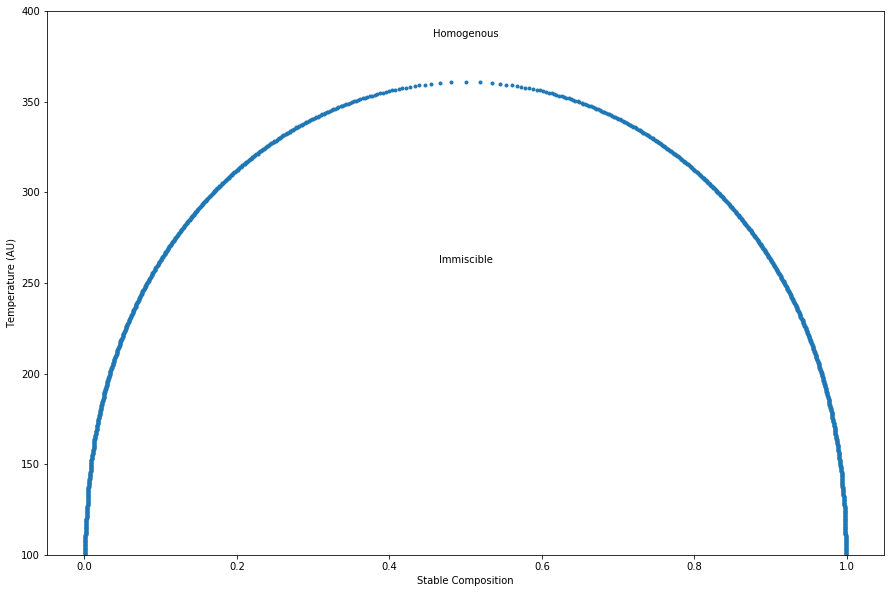

In [12]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(.001,.9999,1000)
xb = 1-xa

Na = 10
delU = 100
z = 6
def alphaf(T): return z*Na*delU/(R*T)

Ts = linspace(100,500,1000)

figure(figsize=(15,10))
phase = []
Tnew = []

Tc =  z*Na*delU/(2*R)

##code the phase envelope and the spinode

for T in Ts:
    alpha = alphaf(T)

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    mini = min(Gmm)
    print diff(Gmm)
    for x in range(len(xb)):
        if Gmm[x] == mini and T < Tc : 
            phase.append(xb[x])
            phase.append(1-xb[x])
            Tnew.append(T)
            Tnew.append(T)

        
Tnew.append(Tc)
phase.append(.5)
ylim([100,400])
plot(outs,Tnew,'.')
xlabel("Stable Composition")
ylabel("Temperature (AU)")
annotate("Homogenous",xy=(.5,Tc+25),ha="center")
annotate("Immiscible",xy=(.5,Tc-100),ha="center")

show()

So we can estimate the free energy of the solution as a taylor series...

$$G(c) = G(c_0)+(c-c_0)\frac{\partial G}{\partial c}|_{c_0} + \frac{(c-c_o)^2}{2}\frac{\partial^2 G}{\partial c^2}|_{c_0} + ...$$

and in regions there will be small fluctuations due to entropy, so...
$$\Delta G = \frac{1}{2}[G(c_0+\Delta c)+G(c_0-\Delta c)] - G(c_0)$$ 

So the change in energy can be approximated as

$$\Delta G \approx \frac{(\Delta c)^2}{2} \frac{\partial^2 G}{\partial c^2}|_{c_0}  $$


So if 

$$0>\frac{\partial^2 G}{\partial c^2}|_{c_0}$$

The solution goes unstable


 

## The Cahn Model of Diffusion and Phase Behavior

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-18-at-12.49.59-PM.png">


$$\Delta G \approx \frac{(c-c_0)^2}{2} \frac{\partial^2 G}{\partial c^2}|_{C_0} + \kappa (\nabla c)^2 $$


$$\Lambda = \frac{2\pi}{\beta} > \frac{2\pi}{\beta_C}  $$


$$A(\beta,t) = A(\beta,0)e^{R(\beta)t}$$


What this says, qualtiatvely, from scherer, page 175:

>- Separation within the spinodal curve
 - Uphill diffusion creates numerous fluctuations with Λ ≈ 1 - 10 nm
 - Amplitude of fluctuation increases, while wavelength remains constant 
 - Compositions of regions approach spinode
- After entering binodal region
 - Diffusion - controlled growth begins
 - Separated regions grow as Λ ~ t1/3
 - Compositions of regions approach binode (no nucleation event is required, because the compositions of the phases are already sufficiently different to satisfy the criterion for growth)
- As composition stabilizes
 - Coarsening driven by surface energy
 - Smaller particles dissolve and larger particles grow

This is best visualized.  Let's do it.
Special thanks to https://documents.epfl.ch/users/f/fi/fiocco/www/JournalClubFiles/ModelB.pdf
